#  Exploratory Modeling - 1st Edition

In [1]:
from src.transforming import transform

help(transform)

Help on function transform in module src.transforming:

transform()
    This function transforms the csv file that was fetched previously.
    The dataset contains game data for each team and each season from 1994-2022.
    The function prepares the dataset for modeling.
    All categorical columns will be converted into numerical data types.



In [2]:
#df = transform()

In [3]:
# common imports
import requests
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sys

In [4]:
# Importing data from csv file
path = "/Users/mirror/Desktop/GitHub/nfl_game_predictor/data/transformed.csv"
df = pd.read_csv(path)

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df

,season,week,day,ot,away_t,home_t,month,hour,date,ht_pts_scored,...,ht_to_rolling,ht_totyd_allowed_rolling,ht_to_forced_rolling,ht_passyd_rolling,ht_rushyd_rolling,ht_passyd_allowed_rolling,ht_rushyd_allowed_rolling,ht_1st_downs_rolling,ht_1st_downs_allowed_rolling,ot_rolling
0,1994,1,4,0,Seattle Seahawks,Washington Commanders,9,13,1994-09-04 13:00:00,7.0,...,2.75,362.50,1.25,213.75,92.75,232.00,130.50,20.25,23.25,0.00
1,1994,1,4,0,Philadelphia Eagles,New York Giants,9,13,1994-09-04 13:00:00,28.0,...,2.75,367.75,0.75,224.50,82.50,237.50,130.25,19.25,21.75,0.00
2,1994,1,4,0,Minnesota Vikings,Green Bay Packers,9,13,1994-09-04 13:00:00,16.0,...,2.50,352.25,1.00,213.75,76.50,236.75,115.50,17.25,20.75,0.00
3,1994,1,4,1,Atlanta Falcons,Detroit Lions,9,13,1994-09-04 13:00:00,31.0,...,1.75,334.50,1.00,186.50,104.50,227.50,107.00,17.00,19.25,0.25
4,1994,1,4,0,Tampa Bay Buccaneers,Chicago Bears,9,13,1994-09-04 13:00:00,21.0,...,1.00,320.50,1.00,181.50,112.50,228.75,91.75,17.00,17.75,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,2022,9,6,0,Green Bay Packers,Detroit Lions,11,13,2022-11-06 13:00:00,15.0,...,1.25,336.75,1.75,153.00,155.75,255.25,81.50,19.50,17.75,0.00
5820,2022,9,6,0,Los Angeles Rams,Tampa Bay Buccaneers,11,16,2022-11-06 16:00:00,16.0,...,1.00,308.00,1.50,162.25,126.50,227.75,80.25,18.50,16.00,0.00
5821,2022,9,6,0,Seattle Seahawks,Arizona Cardinals,11,16,2022-11-06 16:00:00,21.0,...,0.75,329.25,1.25,168.75,106.75,232.25,97.00,17.50,18.00,0.00
5822,2022,9,6,1,Tennessee Titans,Kansas City Chiefs,11,20,2022-11-06 20:00:00,20.0,...,0.75,311.25,1.00,242.75,91.75,185.25,126.00,20.25,16.00,0.25


In [7]:
# importing packages
import pandas as pd
import numpy as np
import datetime
from datetime import date
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

### Preparing Data for Modeling

In [8]:
train = df[df["season"] < 2018]
test = df[df["season"] >= 2018]

predictors = ['season', 'ot', 'week', 'day', 'month', 'hour', 'opp_code', 
              'home_team', 'result_rolling', 'points_scored_rolling', 'points_allowed_rolling', 
              'totyd_rolling', 'to_rolling', 'totyd_allowed_rolling', 'to_forced_rolling']

In [9]:
df.dtypes

season                            int64
week                             object
day                               int64
ot                                int64
away_t                           object
home_t                           object
month                             int64
hour                              int64
date                             object
ht_pts_scored                   float64
ht_pts_allowed                  float64
ht_1st_downs                    float64
ht_totyd                        float64
ht_passyd                       float64
ht_rushyd                       float64
ht_to                           float64
ht_1st_downs_allowed            float64
ht_totyd_allowed                float64
ht_passyd_allowed               float64
ht_rushyd_allowed               float64
ht_to_forced                    float64
ht_wins                           int64
ht_wins_rolling                 float64
ht_pts_scored_rolling           float64
ht_pts_allowed_rolling          float64


In [13]:
X_train = train[predictors]
X_test = test[predictors]
y_train = train['result']
y_test = test['result']


In [14]:
y_train

0        0
1        1
2        0
3        1
4        0
        ..
11289    0
11290    0
11291    1
11292    1
11293    0
Name: result, Length: 9564, dtype: int64

### First Model - Decision Tree Classifier

In [15]:
# creating the decision tree
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [16]:
# predicting on the test set
tree_clf_pred = tree_clf.predict(X_test)

In [17]:
# evaluating the accuracy
acc_score = accuracy_score(y_true=y_test, y_pred=tree_clf_pred)
prec_score = precision_score(y_true=y_test, y_pred=tree_clf_pred, average='micro')
recall_score = recall_score(y_true=y_test, y_pred=tree_clf_pred, average='micro')
print('Accuracy = %s' % (acc_score))
print('Precision = %s' % (prec_score))
print('Recall = %s' % (recall_score))

Accuracy = 0.5050448430493274
Precision = 0.5050448430493274
Recall = 0.5050448430493274


In [18]:
tree_clf.score(X_test, y_test)

0.5050448430493274

In [19]:
# generalization error for decision tree test sets
print('The generalization effor for the Decision Tree model is', round(mean_squared_error(y_true=y_test, y_pred=tree_clf_pred), 5))

The generalization effor for the Decision Tree model is 0.49496


In [20]:
print(confusion_matrix(tree_clf_pred, y_test))

[[424 433]
 [450 477]]


In [21]:
print(classification_report(tree_clf_pred, y_test))

              precision    recall  f1-score   support

           0       0.49      0.49      0.49       857
           1       0.52      0.51      0.52       927

    accuracy                           0.51      1784
   macro avg       0.50      0.50      0.50      1784
weighted avg       0.51      0.51      0.51      1784



In [22]:
X_train.corrwith(y_train, axis = 0)

season                    0.001852
team_code                 0.029025
week                     -0.037203
day                       0.011484
month                    -0.042969
hour                      0.000551
opp_code                 -0.030706
home_team                 0.158571
result_rolling            0.165940
points_scored_rolling     0.160193
points_allowed_rolling   -0.108194
totyd_rolling             0.135690
to_rolling               -0.083798
totyd_allowed_rolling    -0.062234
to_forced_rolling         0.039560
dtype: float64

In [23]:
# creating grid_search dictionary for the decision tree classifier
param_grid = {'max_depth' : [4,5,6,8,10], 'max_leaf_nodes' : list(range(2, 50)), 'min_samples_split' : [2]}

In [24]:
# instantiating gridsearch
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

print("The best parameters are: ", grid_search_cv.best_params_)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The best parameters are:  {'max_depth': 4, 'max_leaf_nodes': 3, 'min_samples_split': 2}


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:   10.4s finished


#### On this dataset, the optimal model parameters for the `Decision Tree Classifier` class are:

- `max_leaf_nodes = 8`
- `max_depth = 4`
- `min_samples_split = 2`

In [25]:
# instantiating new decision tree classifier with the best parameter attributes
new_tree_clf = DecisionTreeClassifier(random_state=42, max_depth = grid_search_cv.best_params_['max_depth'],
                                      max_leaf_nodes = grid_search_cv.best_params_['max_leaf_nodes'], 
                                      min_samples_split = grid_search_cv.best_params_['min_samples_split'])
# fitting the new tree
new_tree_clf.fit(X_train, y_train)

new_tree_clf_pred = new_tree_clf.predict(X_test)

In [26]:
# calling the score classes on the new model
new_acc_score = accuracy_score(y_true=y_test, y_pred=new_tree_clf_pred)
new_prec_score = precision_score(y_true=y_test, y_pred=new_tree_clf_pred, average='micro')
#new_recall_score = recall_score(y_true=y_test, y_pred=new_tree_clf_pred, average='micro')

print('Accuracy = %s' % (new_acc_score))
print('Precision = %s' % (new_prec_score))
#print('Recall = %s' % (new_recall_score))

Accuracy = 0.5336322869955157
Precision = 0.5336322869955157


In [27]:
new_tree_clf.score(X_test, y_test)

0.5336322869955157

In [28]:
# generalization error for gbr test sets
print('The generalization effor for the new Decision Tree model is', round(mean_squared_error(y_true=y_test, y_pred=new_tree_clf_pred), 5))

The generalization effor for the new Decision Tree model is 0.46637


In [29]:
print(confusion_matrix(new_tree_clf_pred, y_test))

[[468 426]
 [406 484]]


In [30]:
print(classification_report(new_tree_clf_pred, y_test))

              precision    recall  f1-score   support

           0       0.54      0.52      0.53       894
           1       0.53      0.54      0.54       890

    accuracy                           0.53      1784
   macro avg       0.53      0.53      0.53      1784
weighted avg       0.53      0.53      0.53      1784



In [31]:
# manual confusion matrix
combined = pd.DataFrame(dict(actual=y_test, prediction=new_tree_clf_pred))
pd.crosstab(index=combined['actual'], columns=combined['prediction'])

prediction,0,1
actual,,
0,468,406
1,426,484


In [32]:
# tree as text
#cols = df.columns.tolist()
feats = X_train.columns.tolist()
r = export_text(tree_clf, feature_names=feats)
print(r)

|--- home_team <= 0.50
|   |--- points_scored_rolling <= 19.88
|   |   |--- points_allowed_rolling <= 27.38
|   |   |   |--- points_scored_rolling <= 14.62
|   |   |   |   |--- team_code <= 20.50
|   |   |   |   |   |--- team_code <= 5.50
|   |   |   |   |   |   |--- to_forced_rolling <= 0.62
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- to_forced_rolling >  0.62
|   |   |   |   |   |   |   |--- points_allowed_rolling <= 12.62
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- points_allowed_rolling >  12.62
|   |   |   |   |   |   |   |   |--- to_forced_rolling <= 2.12
|   |   |   |   |   |   |   |   |   |--- week <= 9.50
|   |   |   |   |   |   |   |   |   |   |--- totyd_rolling <= 294.25
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- totyd_rolling >  294.25
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   

[Text(173.15483187391845, 214.24235294117648, 'X[7] <= 0.5\ngini = 0.5\nsamples = 9564\nvalue = [4692, 4872]'),
 Text(90.15965323639892, 207.8470588235294, 'X[9] <= 19.875\ngini = 0.49\nsamples = 4790\nvalue = [2729, 2061]'),
 Text(43.51594806643944, 201.45176470588234, 'X[10] <= 27.375\ngini = 0.452\nsamples = 1841\nvalue = [1205, 636]'),
 Text(24.15234179971489, 195.0564705882353, 'X[9] <= 14.625\ngini = 0.465\nsamples = 1525\nvalue = [965, 560]'),
 Text(7.80064117162728, 188.66117647058823, 'X[1] <= 20.5\ngini = 0.415\nsamples = 432\nvalue = [305, 127]'),
 Text(3.54776027889214, 182.26588235294116, 'X[1] <= 5.5\ngini = 0.371\nsamples = 289\nvalue = [218, 71]'),
 Text(1.543184485748822, 175.87058823529412, 'X[14] <= 0.625\ngini = 0.459\nsamples = 101\nvalue = [65, 36]'),
 Text(1.3763537305327331, 169.47529411764705, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(1.710015240964911, 169.47529411764705, 'X[10] <= 12.625\ngini = 0.432\nsamples = 95\nvalue = [65, 30]'),
 Text(1.5431844

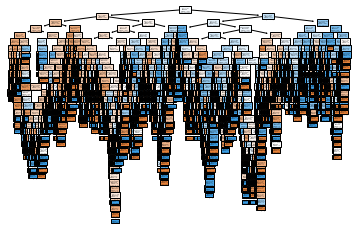

In [33]:
# tree as an image
tree.plot_tree(tree_clf, filled=True)